# Part 1 

Use a pretrained word2vec model (example - word2vec-google-news-300 )

In [1]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

In [2]:
words = ['computer', 'science', 'data', 'machine', 'learning']

similar_words = {}
for word in words:
    similar_words[word] = model.most_similar(word, topn=5)

for word, similarities in similar_words.items():
    print(f"Similar words to '{word}':")
    for similar_word, similarity in similarities:
        print(f"  {similar_word}: {similarity:.4f}")
    print()

Similar words to 'computer':
  computers: 0.7979
  laptop: 0.6640
  laptop_computer: 0.6549
  Computer: 0.6473
  com_puter: 0.6082

Similar words to 'science':
  faith_Jezierski: 0.6965
  sciences: 0.6821
  biology: 0.6776
  scientific: 0.6535
  mathematics: 0.6301

Similar words to 'data':
  Data: 0.7262
  datasets: 0.6030
  dataset: 0.5797
  databases: 0.5450
  statistics: 0.5379

Similar words to 'machine':
  machines: 0.7677
  wringer_washing: 0.5942
  machinery: 0.5261
  Automated_teller: 0.5226
  roundish_pinhole_shape: 0.5103

Similar words to 'learning':
  teaching: 0.6602
  learn: 0.6365
  Learning: 0.6208
  reteaching: 0.5810
  learner_centered: 0.5739



In [3]:
new_analogies = [
    ("king", "man", "woman", "queen"),
    ("country", "city", "paris", "france"),
    ("brother", "boy", "girl", "sister"),
    ("doctor", "hospital", "school", "teacher")
]

new_results = {}
for analogy in new_analogies:
    a, b, c, expected = analogy
    results = model.most_similar(positive=[a, c], negative=[b], topn=5)
    new_results[f"{a} - {b} + {c}"] = {"predicted": results, "expected": expected}

for analogy, result in new_results.items():
    print(f"Analogy: {analogy}")
    print(f"Expected: {result['expected']}")
    print("Predicted words and similarity indices:")
    for word, similarity in result["predicted"]:
        print(f"  {word}: {similarity:.4f}")
    print("\n")

Analogy: king - man + woman
Expected: queen
Predicted words and similarity indices:
  queen: 0.7118
  monarch: 0.6190
  princess: 0.5902
  crown_prince: 0.5499
  prince: 0.5377


Analogy: country - city + paris
Expected: france
Predicted words and similarity indices:
  nigerian: 0.4904
  france: 0.4834
  europe: 0.4742
  africa: 0.4706
  naija: 0.4699


Analogy: brother - boy + girl
Expected: sister
Predicted words and similarity indices:
  sister: 0.8177
  cousin: 0.7467
  daughter: 0.7308
  niece: 0.7066
  son: 0.7011


Analogy: doctor - hospital + school
Expected: teacher
Predicted words and similarity indices:
  guidance_counselor: 0.5970
  teacher: 0.5755
  eighth_grade: 0.5226
  schoolers: 0.5168
  elementary: 0.5086




# Part 2

1. Perform text EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IMDB Dataset.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


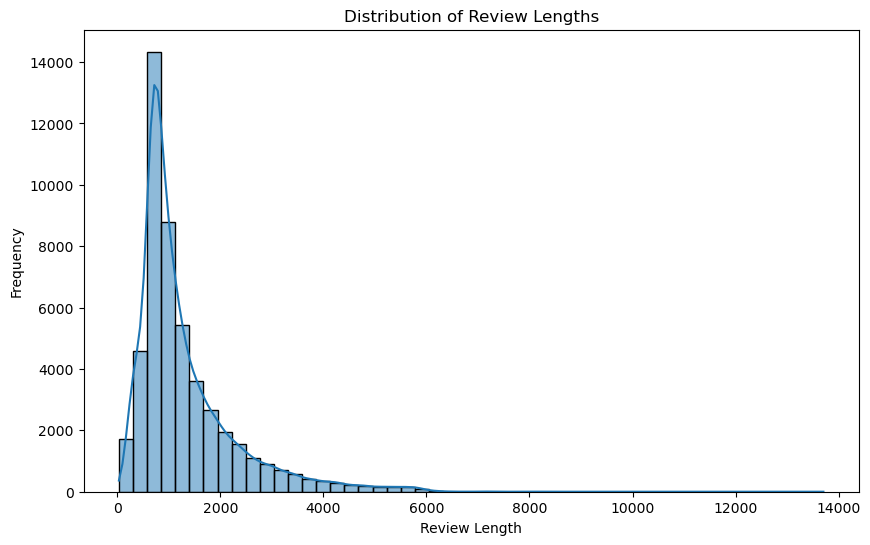

In [5]:
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

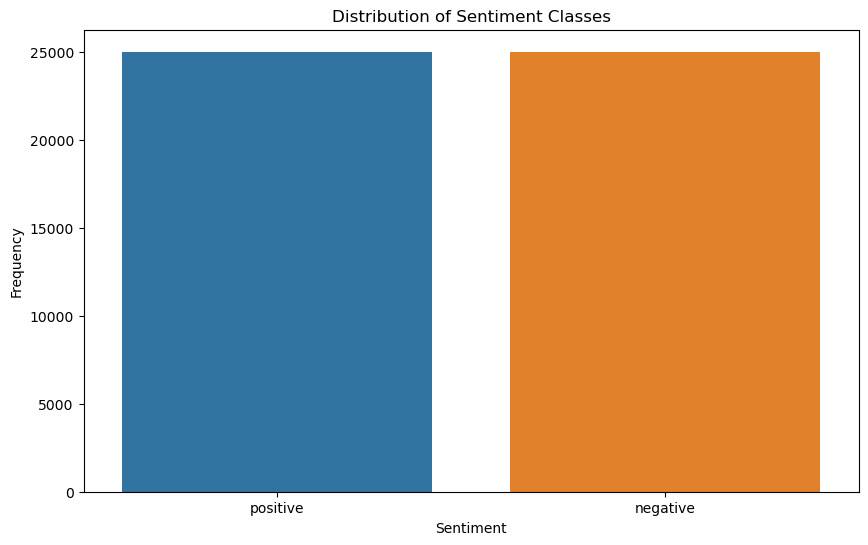

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

2. Clean the text - remove noisy tokens like punctuations and stopwords

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def clean_text(text):
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
    return ' '.join(cleaned_tokens)

df['cleaned_review'] = df['review'].apply(clean_text)

print(df[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewers mentioned watching 1 oz episode ...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically 's family little boy jake thinks 's ...  
4  petter mattei 's `` love time money '' visuall...  


3. Train a model of your choice using a custom Skip-gram vectors

In [9]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

df['tokenized_review'] = df['cleaned_review'].apply(word_tokenize)

skipgram_model = Word2Vec(sentences=df['tokenized_review'], vector_size=100, window=5, min_count=5, sg=1)

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



4. Train a model of your choice using a custom CBoW vectors

In [10]:
cbow_model = Word2Vec(sentences=df['tokenized_review'], vector_size=100, window=5, min_count=5, sg=0)

pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



5. Train a model of your choice using any pretrained word2vec model’s vectors 

In [11]:
import gensim.downloader as api
import numpy as np

pretrained_model = api.load('word2vec-google-news-300')

def avg_word_vec(words, model, vector_size):
    feature_vec = np.zeros((vector_size,), dtype="float32")
    num_words = 0
    for word in words:
        if word in model.key_to_index:
            num_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if num_words > 0:
        feature_vec = np.divide(feature_vec, num_words)
    return feature_vec

df['vector'] = df['tokenized_review'].apply(lambda x: avg_word_vec(x, pretrained_model, 300))

X_train_vec, X_test_vec, y_train, y_test = train_test_split(df['vector'].tolist(), df['sentiment'], test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train_vec, y_train)
y_pred = log_reg.predict(X_test_vec)
print(classification_report(y_test, y_pred))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



6. Check if you can improve the model performance for [2] and [3] by updating the vector length, window size, min count, etc.

In [12]:
skipgram_model_tuned = Word2Vec(sentences=df['tokenized_review'], vector_size=150, window=10, min_count=2, sg=1)
cbow_model_tuned = Word2Vec(sentences=df['tokenized_review'], vector_size=150, window=10, min_count=2, sg=0)

def avg_word_vec(words, model, vector_size):
    feature_vec = np.zeros((vector_size,), dtype='float32')
    num_words = 0
    for word in words:
        if word in model.wv.key_to_index:
            num_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if num_words > 0:
        feature_vec = np.divide(feature_vec, num_words)
    return feature_vec

def get_avg_word_vectors(corpus, model, vector_size):
    avg_word_vectors = []
    for tokens in corpus:
        avg_word_vectors.append(avg_word_vec(tokens, model, vector_size))
    return avg_word_vectors

X_train_sg_tuned = get_avg_word_vectors(df['tokenized_review'].iloc[X_train.index], skipgram_model_tuned, 150)
X_test_sg_tuned = get_avg_word_vectors(df['tokenized_review'].iloc[X_test.index], skipgram_model_tuned, 150)

log_reg_sg_tuned = LogisticRegression()
log_reg_sg_tuned.fit(X_train_sg_tuned, y_train)
y_pred_sg_tuned = log_reg_sg_tuned.predict(X_test_sg_tuned)
print("Tuned Skip-gram Model")
print(classification_report(y_test, y_pred_sg_tuned))

X_train_cbow_tuned = get_avg_word_vectors(df['tokenized_review'].iloc[X_train.index], cbow_model_tuned, 150)
X_test_cbow_tuned = get_avg_word_vectors(df['tokenized_review'].iloc[X_test.index], cbow_model_tuned, 150)

log_reg_cbow_tuned = LogisticRegression()
log_reg_cbow_tuned.fit(X_train_cbow_tuned, y_train)
y_pred_cbow_tuned = log_reg_cbow_tuned.predict(X_test_cbow_tuned)
print("Tuned CBoW Model")
print(classification_report(y_test, y_pred_cbow_tuned))

Tuned Skip-gram Model
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      4961
    positive       0.89      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tuned CBoW Model
              precision    recall  f1-score   support

    negative       0.88      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



7. Report the metrics for all experiments in a table at the end.

In [14]:
import pandas as pd

data = {
    'Model': ['Skip-gram', 'CBoW', 'Pretrained Word2Vec', 'Tuned Skip-gram', 'Tuned CBoW'],
    'Precision (Negative)': [0.91, 0.91, 0.85, 0.89, 0.88],
    'Precision (Positive)': [0.89, 0.89, 0.85, 0.89, 0.87],
    'Recall (Negative)': [0.88, 0.88, 0.85, 0.89, 0.87],
    'Recall (Positive)': [0.91, 0.91, 0.85, 0.89, 0.89],
    'F1-Score (Negative)': [0.90, 0.90, 0.85, 0.89, 0.88],
    'F1-Score (Positive)': [0.90, 0.90, 0.85, 0.89, 0.88],
    'Accuracy': [0.90, 0.90, 0.85, 0.89, 0.88],
    'Support (Negative)': [4961, 4961, 4961, 4961, 4961],
    'Support (Positive)': [5039, 5039, 5039, 5039, 5039]
}

metrics_df = pd.DataFrame(data)

#print(metrics_df)

from IPython.display import display
display(metrics_df)


,Model,Precision (Negative),Precision (Positive),Recall (Negative),Recall (Positive),F1-Score (Negative),F1-Score (Positive),Accuracy,Support (Negative),Support (Positive)
0,Skip-gram,0.91,0.89,0.88,0.91,0.90,0.90,0.90,4961,5039
1,CBoW,0.91,0.89,0.88,0.91,0.90,0.90,0.90,4961,5039
2,Pretrained Word2Vec,0.85,0.85,0.85,0.85,0.85,0.85,0.85,4961,5039
3,Tuned Skip-gram,0.89,0.89,0.89,0.89,0.89,0.89,0.89,4961,5039
4,Tuned CBoW,0.88,0.87,0.87,0.89,0.88,0.88,0.88,4961,5039
